<div style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>Table of Contents</h3>
			<ul style="margin-right: 0;">
				<li>
                    <a href="#sec_intro">
                        Introduction
                    </a>
                </li>
                <li>
					<a href="#sec_1">
                    What is Optimization?
                    </a>
				</li>
                <li>
					<a href="#sec_2">
                What do we mean by Convex?
                    </a>
				</li>
                 <li>
					<a href="#sec_3">
                Convex Optimization Problem
                    </a>
				</li>
                 <li>
					<a href="#sec_4">
                Convex Optimization Applications
                    </a>
				</li>
                 <li>
					<a href="#sec_5">
                Practical Example using CVXPY
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br />
<div id="sec_intro" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
Introduction
        </font>
		<p></p>
		<hr>
Convex Optimization is a subfield of mathematical optimization that studies the problem of minimizing convex functions over convex sets. Many methods are classified as convex optimization.
Although it is instrumental in Artificial Intelligence, Convex Optimization is a general technique that does not limit to Artificial Intelligence and has applications in various fields, such as information and communication systems, circuit design, portfolio optimization (stock exchange), and many others more.
This Notebook will cover the fundamental theoretical concepts and optimization and convex optimization and show some simple Python examples to learn how to use this technique.



To define Convex Optimization, we must first look at the definitions of optimization and convex functions.
        <br>
        <br/>
</font>
</div>

<p></p>
<br />
<div id="sec_1" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
What is Optimization?
        </font>
		<p></p>
		<hr>

Mathematical optimization is selecting the best element, subject to some criterion from a set of available alternatives. It must be noted that the word Optimization is used in many different contexts. For example, we have Compiler Optimization in programming language implementation and compiler theory, which is very different from what we will talk about. In this notebook, whenever you see optimization, it means "Mathematical Optimization." 

Many definitions try to formalize the definition of Mathematical Optimization. Here, we present one of the most used notations.

$$
\text{minimize} \hspace{1cm} f_0(x)
$$
$$\hspace{5.3cm} \text{subject to} \hspace{1cm} f_i(x) \leq 0, i=1,\cdots,m$$
$$\hspace{9cm} g_i(x) = 0, i=1,\cdots,p$$

In which $x \in \mathbb{R}^n$ is a vector varialbe to be chosen. $f_0$ is the objective function to be minimized. $f_1,\cdots,f_m$ are the inequality constraint functions. And $g_1,\cdots,g_p$ are the equality constraint functions.

There are various variations of these notations, but they can easily be transformed to the one presented above. For example the problem of maximizing function $f_0(x)$ could easily be transformed into the problem of minimizing function $-f_o(x)$.

There are two aspects in optimization problems:

- Finding good models
- Solving the problem

Each of these two aspects is as important as the other one. If you don't have a good model, solving it will not help you solve the real-world problem.

A model is a mapping from the real-world high-level description of the problem to the mathematical notations. For example, in circuit design problems, x can represent the specifications of the actual design, like the placement of each component and other technical information. Constraints come from the physical limitations of the manufacturing process and performance requirements, and last, but not least, the objective function can be a combination of cost, weight, power, area, etc. We should define all of these aspects mathematically in order to have a good model.

There are multiple methods to solve the problem. Convex Optimization focuses on methods of solving specific but prevalent types of optimization problems. More on that later.
      
        
</font>
</div>
        

<p></p>
<br />
<div id="sec_2" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
What do we mean by Convex?
        </font>
		<p></p>
		<hr>

If you remember High School geometry, a convex polygon is a polygon in which no line segment between two points on the boundary ever goes outside the polygon.

Convex functions and Convex sets follow the same intuition. A function $f: D \to \mathbb{R}$ is called convex if and only if the following condition holds:

- For all $0\leq \theta \leq 1$ and all $x_1 , x_2 \in X$: $f(\theta x_1 + (1-\theta) x_2) \leq \theta f(x_1) + (1-\theta) f(x_2)$.

Also a function is Strictly Convex if and olny if the following confition holds:

- For all $0\ < \theta < 1$ and all $x_1 , x_2 \in X$: $f(\theta x_1 + (1-\theta) x_2) < \theta f(x_1) + (1-\theta) f(x_2)$.

<center><img src="images/ConvexFunction.svg" style="width: 90%;"/></center>

Assume we have two points $(x_1 , f(x_1)) , (x_2 , f(x_2))$ and we connect them with a straight line. If the function $f$ is convex, then all other points on the function between $x_1$ and $x_2$ must reside under this line.


A convex set is an affine space over the reals that, given any two points in it, the set contains the whole line segment that joins them.

<center><img src="images/ConvexPolygon.svg" style="width: 25%;"/></center>
        
</font>
</div>

<p></p>
<br />
<div id="sec_3" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
Convex Optimization Problem
        </font>
		<p></p>
		<hr>

The Convex Optimization problem most used notation is
$$
\text{minimize} \hspace{1cm} f_0(x)
$$
$$\hspace{3.1cm} \text{subject to} \hspace{1cm} f_i(x) \leq 0, i=1,\cdots,m$$
$$\hspace{3.0cm} A x = b$$


In which $x \in \mathbb{R^n}$ and $f_0 ,... , f_m$ are convex. Also, we must note that equality constraints are linear and cannot be arbitrary functions. To show linear equations, we use matrix notations. If we want to have $p$ different equality constraints, we denote it as multiplication of a $p \times n$ matrix $A$ and a $n\times1$ column vector variable $x$; therefore, the other side of the equation will be a $p\times 1$ column vector. 

Convex functions have a lot of good properties that help us get to the result easier. You can find some of these properties in [Wikipedia](https://en.wikipedia.org/wiki/Convex_function#Properties). These properties lead to some crucial properties of convex optimization problems:

- Every local minimum is a global minimum.
- The optimal set is convex.
- If the objective function is strictly convex, then the problem has at most one optimal point.


These properties lead to methods that can numerically solve convex optimization problems in polynomial time.

Because of having efficient methods, we usually try to formulate optimization problems as convex. Some problems can easily be transformed into this format, but we need some tricks for other problems. Some of the more common tricks are listed here:

- Change of variables
- Approximation of true objective function and constraints.
- Relaxation: ignoring some constraints that are hard to handle.

</font>
</div>
        

<p></p>
<br />
<div id="sec_4" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
Convex Optimization Applications
        </font>
		<p></p>
		<hr>

Many optimization methods are different cases of convex optimization or can be reduced to convex optimization with some tricks. You can see a small list of some well-known optimization methods that can be reduced to convex optimization. You may be familiar with some of these concepts. This list shows how robust convex optimization is.

- Least Squares Method
    - [Youtube video: Basics of Least Squares Method](https://www.youtube.com/watch?v=P8hT5nDai6A)
    - [Webiste: Python guide on Least Squares Regression](https://www.edureka.co/blog/least-square-regression/)
- Linear Programming
    - [Youtube video: Basics of Linear Programming](https://www.youtube.com/watch?v=Bzzqx1F23a8)
    - [Youtube video: Solving a simple example using Linear Programming](https://www.youtube.com/watch?v=reKV1lRn_uw)
    - [Website: Python guide on Linear Programming](https://realpython.com/linear-programming-python/)
- Quadratic Programming 
    - [Youtube video: Overview of Quadratic Programming](https://www.youtube.com/watch?v=GZb9647X8sg)
    - [Website: Quadratic Programming in Python](https://scaron.info/blog/quadratic-programming-in-python.html)
- Geometric Programming
    - [Educatioanl Article: A tutorial on Geometric Programming (Stanford University)](https://web.stanford.edu/~boyd/papers/pdf/gp_tutorial.pdf)
- Some variations of Statistical Regression (including Regularization)
    - [Youtube Video: Excellent Introduction to Regularization Part 1](https://www.youtube.com/watch?v=Q81RR3yKn30)
    - [Youtube Video: Excellent Introduction to Regularization Part 2](https://www.youtube.com/watch?v=NGf0voTMlcs)
    - [Youtube Video: Excellent Introduction to Regularization Part 3](https://www.youtube.com/watch?v=1dKRdX9bfIo)
- Combinatorial Optimization
    - [Youtube Video: Combinatorial Optimization @ Google](https://www.youtube.com/watch?v=iF2rHY318iU)
    - [Youtube Video: Google TechTalk about Combinatorial Optimization](https://www.youtube.com/watch?v=p_PK1CuEuAE)
    - [Book: Combinatorial Optimization - Bernhard Korte, Jens Vygen](https://www.springer.com/gp/book/9783540292975)
        
        <br/>
  
        
Moreover, Convex Optimization is used in many different scientific fields and areas. Here we list some application areas of Convex Optimization. Below each item, you can see one or more links to sites containing more information about the subject or the application of convex optimization in that area.

    
    
- Machine Learning:

    - [Lecture: Introduction to Convex Optimization for Machine Learning (University of California, Berkeley)](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf)
    - [Webiste: Convex Optimization in Deep Learning](https://medium.com/lsc-psd/convex-optimization-in-deep-learning-ea90f1ed1c5d)
- Finance
    - [Lecture: Convex Optimization in Finance (Baruch College, New York)](https://mfe.baruch.cuny.edu/wp-content/uploads/2014/12/Opt_Lecture5_2019.pdf)
- Signal Processing and Communications
    - [Book: Convex Optimization in Signal Processing and Communications - Daniel P. Palomar, Yonina C. Eldar](https://books.google.nl/books/about/Convex_Optimization_in_Signal_Processing.html?id=UOpnvPJ151gC&source=kp_book_description&redir_esc=y)
- Circuit Design
    - [Website: Basic Introduction to Circuit Design (Wikipedia)](https://en.wikipedia.org/wiki/Circuit_design)
    - [Article: A good article on using convex optimization for circuit design](https://chic.caltech.edu/wp-content/uploads/2014/03/Lavaei-CDC2009.pdf)
- System and Control Theory
    - [Lecture: Convex Optimization in
System and Control Theory (Stanford University)](https://stanford.edu/~boyd/papers/pdf/siam_conf_control_talk.pdf)
- Quantum Information Theory
    - [Website: Quantum Information Fundamentals](https://physicsworld.com/a/fundamentals-of-quantum-information/)
    - [Lecture: Quantum Information and Convex Optimization (MIT)](http://www.mit.edu/~aram/talks/14/convex-quantum.pdf)
    - [Youtube video: Tutorial on Quantum Information and Convex Optimization (Cambridge University)](https://www.youtube.com/watch?v=7nwwX-dx1L4)
- Flux Balance Analysis (A computational biology method related to metabolism networks)
    - [Website: Flux Balance Analysis (Wikipedia)](https://en.wikipedia.org/wiki/Flux_balance_analysis)

</font>
</div>

<p></p>
<br />
<div id="sec_5" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
Practical Example using CVXPY
        </font>
		<p></p>
		<hr>

CVXPY is a great python library developed initially at Stanford University. It is a domain-specific language embedded in python that allows the programmer to define the problem model easily and solve the problem using Convex Optimization techniques.

In this notebook, we examine the in-painting problem. In this problem, the program receives a corrupted image. Some pixel values of this corrupted image are missing, and the program should try to guess these missing values to get a clear image.
        
 <br>
    
First, we install the required packages using pip. Note that installing and downloading CVXPY may take a little longer than NumPy and Matplotlib.
        
</font>
</div>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy


<div id="sec_3" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<p></p>

Consider the following image of a cat. We make it corrupted by keeping about 30% percent of its pixels and discarding others. Then we try to develop a simple algorithm that gets the corrupted image as input and tries to in-paint the image.
    
    
</font>
</div>

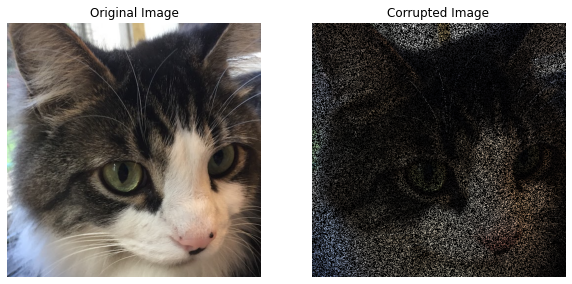

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the images.
u_orig = plt.imread("./images/cat512color.png")
rows, cols, colors = u_orig.shape

# known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
# The known matrix is initialized randomly.
known = np.zeros((rows, cols, colors))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.7:
            for k in range(colors):
                known[i, j, k] = 1        
u_corr = known * u_orig

# Display the images.
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(u_orig, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(u_corr);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');


<div id="sec_3" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<p></p>

For the in-painting, we must find a way to guess the value of missing pixels. Let us denote the pixels array with $P_{i,j}$ notation. We can choose many different objective functions. Here we use $l_2$ total variation and try to minimize it. By minimizing total variation, we try to make each missing pixel have the minimum possible distance from its neighbors.        
$$
\text{total_variation}(P)=\sum_{i=1}^{m-1} \sum_{j=1}^{n-1}\left\|\left[\begin{array}{l}P_{i+1, j}-P_{i j} \\ P_{i, j+1}-P_{i j}\end{array}\right]\right\|_{2}
$$    
    
</font>
</div>

In [3]:
import cvxpy as cp


variables = []
constraints = []
for i in range(colors): # colors == 3
    U = cp.Variable(shape=(rows, cols))
    variables.append(U)
    constraints.append(cp.multiply(known[:, :, i], U) == cp.multiply(known[:, :, i], u_corr[:, :, i]))

objective_function = cp.Minimize(cp.tv(*variables)) # tv is total variation
problem = cp.Problem(objective_function, constraints)
problem.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(problem.value))

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 03 02:34:42 AM: Your problem has 786432 variables, 3 constraints, and 0 parameters.
(CVXPY) Oct 03 02:34:42 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 03 02:34:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 03 02:34:42 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 03 02:34:42 AM: Compiling problem (target solver=SCS).
(CVXPY) Oct 03 02:34:42 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing


<div id="sec_3" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<p></p>

Now let's see the final result and compare it to the original image.
    
</font>
</div>

(-0.5, 511.5, 511.5, -0.5)

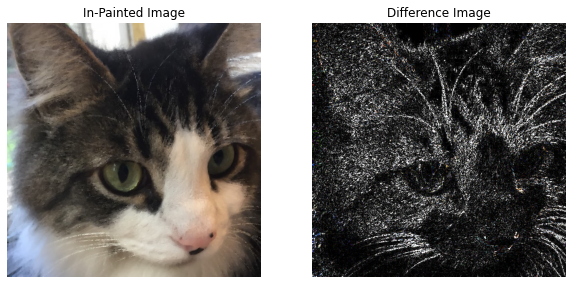

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

rec_arr = np.zeros((rows, cols, colors))
for i in range(colors):
    rec_arr[:, :, i] = variables[i].value
rec_arr = np.clip(rec_arr, 0, 1)

fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(rec_arr)
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = np.clip(10 * np.abs(u_orig - rec_arr), 0, 1)
ax[1].imshow(img_diff)
ax[1].set_title("Difference Image")
ax[1].axis('off')


<div id="sec_3" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<p></p>
        
The in-painted image looks almost identical to the original one. Although it has many differences from the original image and minor artifacts are visible in the picture (for example, in the cat's whiskers), we can say the result is acceptable for almost ten lines of code.
    
</font>
</div>

<p></p>
<br/>
<div id="sec_refs" style="direction:ltr;line-height:300%;">
	<font face="Arial" size=5>
		<font color=#888888 size=6>
References
        </font>
		<hr>       
        <ul>
            <li>
                <a href="https://web.stanford.edu/~boyd/cvxbook/">
Boyd, S., Vandenberghe, L., Boyd, S. P. (2004). Convex Optimization. Spain: Cambridge University Press.
                </a>
            </li>
            <li>
                <a href="https://web.stanford.edu/~boyd/papers/pdf/cvx_opt_intro.pdf">
Boyd, S., Diamond, S., Busseti E., Agrawal, A., Zhang, J. Convex Optimization Overview Slides. Stanford University
                </a>
            </li>
            <li>
                <a href= "https://web.stanford.edu/class/ee364a/">
                Stanford University's EE364A Convex Optimization Course
                </a>
            </li>
        </ul>
	</font>
</div>